In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('hemel/ttt.csv')
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,NaN,2,3,3,0,2,0
332,NaN,3,3,3,0,1,0
333,NaN,4,1,1,0,0,0
334,NaN,5,4,2,1,1,3


In [3]:
df.head(10)


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
5,NaN,12,12,0,2,2,11
6,NaN,13,9,1,0,0,9
7,NaN,14,12,1,0,0,9
8,NaN,15,11,2,1,2,7
9,NaN,16,11,2,3,4,6


# Question 1

Which date had the most completed trips during the two week period?



In [4]:
#Fil the missing vlue
df = df.fillna(method = "ffill")
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0
332,24-Sep-12,3,3,3,0,1,0
333,24-Sep-12,4,1,1,0,0,0
334,24-Sep-12,5,4,2,1,1,3


In [5]:
df_date = df.groupby('Date').sum().reset_index()
df_date.nlargest(2, 'Completed Trips ')


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
12,22-Sep-12,276,960,219,248,344,292
5,15-Sep-12,276,788,258,199,282,193


In [6]:
df_date.nlargest(1, 'Completed Trips ')['Date']

12    22-Sep-12
Name: Date, dtype: object

# Question 2

What was the highest number of completed trips within a 24 hour period?

In [7]:
# to be able to use resample function, create timestamp and use as index
def create_timestamp(date, time):
    return pd.to_datetime(f"{date} {time}:00")
df['Timestamp'] = df.apply(lambda row: create_timestamp(row['Date'], row['Time (Local)']), axis=1)

# calculate rollings sums with 24 hours period
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=24)
df_twentyfour_hrs = df.set_index("Timestamp").rolling(window=indexer, min_periods=1).sum()
df_twentyfour_hrs.nlargest(1, 'Completed Trips ')

C:\Users\anjum\AppData\Local\Temp\ipykernel_14120\1488903490.py:8: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df_twentyfour_hrs = df.set_index("Timestamp").rolling(window=indexer, min_periods=1).sum()


,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
Timestamp,,,,,,
2012-09-21 17:00:00,276.0,1015.0,207.0,278.0,367.0,349.0


In [8]:
# parse time interval to output
time_format = "%Y/%m/%d %H:%M"
df_twentyfour_hrs['Time Interval']  = df_twentyfour_hrs.index.strftime(time_format) +  "-" + (df_twentyfour_hrs.index + pd.Timedelta('24 hours')).strftime(time_format)
df_twentyfour_hrs


,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Time Interval
Timestamp,,,,,,,
2012-09-10 07:00:00,276.0,212.0,38.0,29.0,39.0,150.0,2012/09/10 07:00-2012/09/11 07:00
2012-09-10 08:00:00,276.0,217.0,38.0,29.0,39.0,146.0,2012/09/10 08:00-2012/09/11 08:00
2012-09-10 09:00:00,276.0,222.0,40.0,27.0,37.0,138.0,2012/09/10 09:00-2012/09/11 09:00
2012-09-10 10:00:00,276.0,229.0,39.0,27.0,37.0,130.0,2012/09/10 10:00-2012/09/11 10:00
2012-09-10 11:00:00,276.0,232.0,38.0,28.0,37.0,124.0,2012/09/10 11:00-2012/09/11 11:00
...,...,...,...,...,...,...,...
2012-09-24 02:00:00,20.0,20.0,10.0,3.0,6.0,10.0,2012/09/24 02:00-2012/09/25 02:00
2012-09-24 03:00:00,18.0,17.0,7.0,3.0,4.0,10.0,2012/09/24 03:00-2012/09/25 03:00
2012-09-24 04:00:00,15.0,14.0,4.0,3.0,3.0,10.0,2012/09/24 04:00-2012/09/25 04:00


In [9]:
completed_trips = df_twentyfour_hrs.nlargest(1, 'Completed Trips ')['Completed Trips '].values[0]
time_interval = df_twentyfour_hrs.nlargest(1, 'Completed Trips ')['Time Interval'].values[0]
print("Number of completed trips:", completed_trips)
print("Time Interval:", time_interval)


Number of completed trips: 278.0
Time Interval: 2012/09/21 17:00-2012/09/22 17:00


# Question 3

Which hour of the day had the most requests during the two week period

In [10]:
#aggregate an hour
df_agg_time = df.groupby('Time (Local)').sum().reset_index()
df_agg_time.nlargest(1, 'Requests ')

C:\Users\anjum\AppData\Local\Temp\ipykernel_14120\2184014692.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg_time = df.groupby('Time (Local)').sum().reset_index()


,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
23,23,488,193,126,184,119


In [11]:
df_agg_time.nlargest(1, 'Requests ')['Time (Local)']

23    23
Name: Time (Local), dtype: int64

# Question 4

What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)?

In [12]:
#ALl Zeroes in Dataset
total_zeroes = df['Zeroes '].sum()
total_zeroes

1429

# Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)




In [13]:
# all zeroes in weekend based on given condition
df['Day'] = pd.to_datetime(df['Date']).dt.dayofweek
weekend_zeroes = df[((df['Day'] ==4) & (df['Time (Local)'] >= 17)) | (df['Day'] == 5) |
                  (df['Day'] ==6) & (df['Time (Local)'] <3)]['Zeroes '].sum()
weekend_zeroes


641

In [14]:
#calculate the percentage
weekend_zeroes_pct = weekend_zeroes / total_zeroes *100
print(weekend_zeroes_pct ,"%")

44.856543037088876 %


# Question 5

What is the weighted average ratio of completed trips per driver during the two week period?

In [15]:
# calculate the ratio
df['completed_trip_ratio_per_driver'] = df['Completed Trips '] / df['Unique Drivers']
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp,Day,completed_trip_ratio_per_driver
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00,0,0.222222
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00,0,0.142857
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00,0,0.000000
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00,0,0.000000
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00,0,0.363636
...,...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0,2012-09-24 02:00:00,0,NaN
332,24-Sep-12,3,3,3,0,1,0,2012-09-24 03:00:00,0,NaN
333,24-Sep-12,4,1,1,0,0,0,2012-09-24 04:00:00,0,NaN
334,24-Sep-12,5,4,2,1,1,3,2012-09-24 05:00:00,0,0.333333


In [16]:
# drop rows with nan 
dataset_without_zero_unique_driver = df[df['Unique Drivers'] > 0]
# calculate weighted average by giving weight as day's completed trip ratio all completed trips
weighted_average_ratio = np.average(dataset_without_zero_unique_driver['completed_trip_ratio_per_driver'], weights=dataset_without_zero_unique_driver['Completed Trips '])
weighted_average_ratio

0.8282775715092395

In [17]:
# check it is not same with normal average
np.average(dataset_without_zero_unique_driver['completed_trip_ratio_per_driver'])

0.4743397876937869

# Question 6

In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

In [18]:
# resample with 8 hours period                               
df_agg_eight_hrs = df.set_index("Timestamp").resample('8H').sum()
time_formate = "%Y/%M/%D %H:%M"
df_agg_eight_hrs['Time Interval'] =  df_agg_eight_hrs.index.strftime(time_format) +  "-" + (df_agg_eight_hrs.index + pd.Timedelta('8 hours')).strftime(time_format)
df_agg_eight_hrs

C:\Users\anjum\AppData\Local\Temp\ipykernel_14120\1249848207.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg_eight_hrs = df.set_index("Timestamp").resample('8H').sum()


,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver,Time Interval
Timestamp,,,,,,,,,
2012-09-10 00:00:00,7,5,0,2,2,9,0,0.222222,2012/09/10 00:00-2012/09/10 08:00
2012-09-10 08:00:00,92,78,10,9,11,89,0,0.831169,2012/09/10 08:00-2012/09/10 16:00
2012-09-10 16:00:00,156,106,16,15,21,40,0,3.047619,2012/09/10 16:00-2012/09/11 00:00
2012-09-11 00:00:00,28,33,12,5,7,17,8,1.400000,2012/09/11 00:00-2012/09/11 08:00
2012-09-11 08:00:00,92,108,11,5,6,58,8,0.690079,2012/09/11 08:00-2012/09/11 16:00
2012-09-11 16:00:00,156,173,41,30,39,57,8,4.145887,2012/09/11 16:00-2012/09/12 00:00
2012-09-12 00:00:00,28,39,16,6,13,12,16,2.000000,2012/09/12 00:00-2012/09/12 08:00
2012-09-12 08:00:00,92,213,15,52,60,113,16,3.766558,2012/09/12 08:00-2012/09/12 16:00
2012-09-12 16:00:00,156,171,24,33,41,76,16,3.704240,2012/09/12 16:00-2012/09/13 00:00


In [19]:
df_agg_eight_hrs.nlargest(1, 'Requests ')


,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver,Time Interval
Timestamp,,,,,,,,,
2012-09-21 16:00:00,156,515,88,153,192,198,32,6.357265,2012/09/21 16:00-2012/09/22 00:00


In [20]:
# output time interval
df_agg_eight_hrs.nlargest(1, 'Requests ')['Time Interval']

Timestamp
2012-09-21 16:00:00    2012/09/21 16:00-2012/09/22 00:00
Freq: 8H, Name: Time Interval, dtype: object

# Question 7

True or False: Driver supply always increases when demand increases during the two week period.

In [21]:
# create empty dataframe with only timestamps
difference_df = pd.DataFrame(df['Timestamp'])
# calculate request differences to catch request increases
difference_df['request_diff'] = df['Requests '].shift(-1) - df['Requests ']
# do same of supply side
difference_df['supply_diff'] = df['Unique Drivers'].shift(-1) - df['Unique Drivers']
difference_df

,Timestamp,request_diff,supply_diff
0,2012-09-10 07:00:00,0.0,5.0
1,2012-09-10 08:00:00,-2.0,0.0
2,2012-09-10 09:00:00,1.0,0.0
3,2012-09-10 10:00:00,3.0,-3.0
4,2012-09-10 11:00:00,-2.0,0.0
...,...,...,...
331,2012-09-24 02:00:00,-1.0,0.0
332,2012-09-24 03:00:00,-1.0,0.0
333,2012-09-24 04:00:00,1.0,3.0
334,2012-09-24 05:00:00,1.0,4.0


In [22]:
#increase
(difference_df[difference_df['request_diff'] > 0]['supply_diff'] > 0).all().item()


False

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

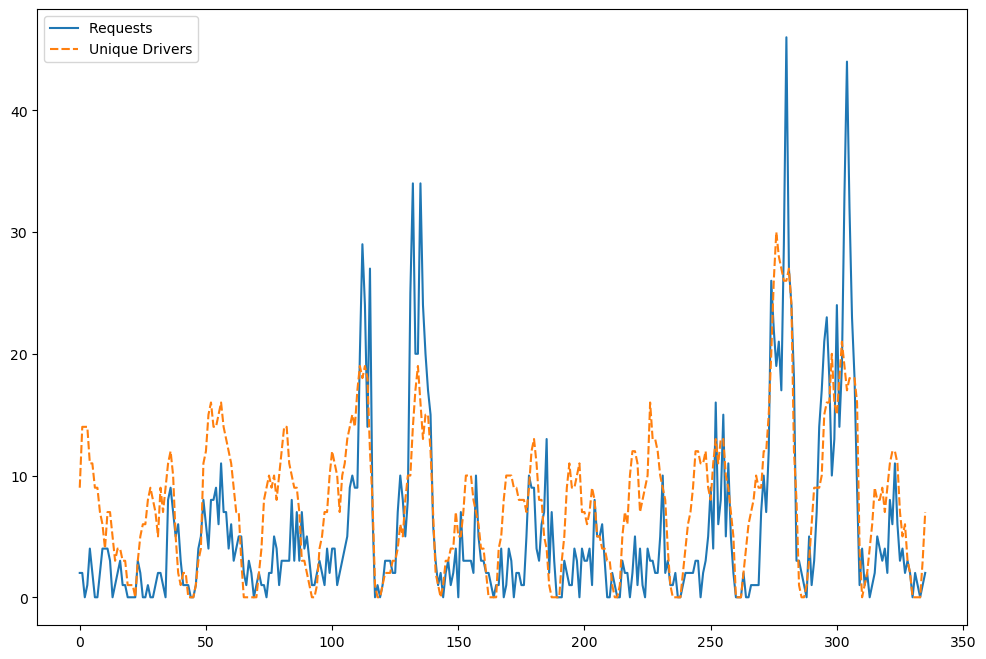

In [24]:
plt.figure(figsize = (12,8))
sns.lineplot(data=df[['Requests ', 'Unique Drivers', 'Timestamp']])
plt.show()

# Question 8

In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

In [28]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=72)
df_agg_three_days = df.set_index("Timestamp").rolling(window=indexer, min_periods=1).sum().reset_index()
df_agg_three_days['zeros_to_eyeballs_ratio'] = df_agg_three_days['Zeroes '] / df_agg_three_days['Eyeballs ']

C:\Users\anjum\AppData\Local\Temp\ipykernel_14120\344530584.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df_agg_three_days = df.set_index("Timestamp").rolling(window=indexer, min_periods=1).sum().reset_index()


In [29]:
df_agg_three_days = df_agg_three_days[df_agg_three_days['Timestamp'] <= (df_agg_three_days['Timestamp'].max() - pd.Timedelta(days=3))]

time_format = "%Y/%m/%d %H:%M"
df_agg_three_days['Time Interval']  = df_agg_three_days['Timestamp'].dt.strftime(time_format) +  "-" + (df_agg_three_days['Timestamp'] + pd.Timedelta('3 days')).dt.strftime(time_format)
df_agg_three_days

,Timestamp,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver,zeros_to_eyeballs_ratio,Time Interval
0,2012-09-10 07:00:00,828.0,956.0,172.0,159.0,211.0,473.0,93.0,20.807776,0.179916,2012/09/10 07:00-2012/09/13 07:00
1,2012-09-10 08:00:00,828.0,961.0,173.0,158.0,210.0,468.0,96.0,20.835553,0.180021,2012/09/10 08:00-2012/09/13 08:00
2,2012-09-10 09:00:00,828.0,964.0,174.0,157.0,209.0,462.0,99.0,20.817696,0.180498,2012/09/10 09:00-2012/09/13 09:00
3,2012-09-10 10:00:00,828.0,970.0,175.0,157.0,209.0,457.0,102.0,20.817696,0.180412,2012/09/10 10:00-2012/09/13 10:00
4,2012-09-10 11:00:00,828.0,976.0,176.0,159.0,210.0,453.0,105.0,21.017696,0.180328,2012/09/10 11:00-2012/09/13 11:00
...,...,...,...,...,...,...,...,...,...,...,...
259,2012-09-21 02:00:00,828.0,2209.0,465.0,535.0,724.0,780.0,352.0,39.191989,0.210502,2012/09/21 02:00-2012/09/24 02:00
260,2012-09-21 03:00:00,828.0,2207.0,468.0,534.0,724.0,775.0,348.0,38.991989,0.212053,2012/09/21 03:00-2012/09/24 03:00
261,2012-09-21 04:00:00,828.0,2207.0,468.0,534.0,725.0,775.0,344.0,38.991989,0.212053,2012/09/21 04:00-2012/09/24 04:00
262,2012-09-21 05:00:00,828.0,2208.0,469.0,534.0,725.0,775.0,340.0,38.991989,0.212409,2012/09/21 05:00-2012/09/24 05:00


In [30]:
df_agg_three_days.nlargest(1, 'zeros_to_eyeballs_ratio')['zeros_to_eyeballs_ratio']


118    0.292977
Name: zeros_to_eyeballs_ratio, dtype: float64

In [31]:
df_agg_three_days.nlargest(1, 'zeros_to_eyeballs_ratio')['Time Interval']


118    2012/09/15 05:00-2012/09/18 05:00
Name: Time Interval, dtype: object

# Question 9

If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?

In [32]:
df_time = df.groupby('Time (Local)').sum().reset_index()
df_time['eyeball_to_driver_ratio'] = df_agg_time['Eyeballs '] / df_time['Unique Drivers'] 
df_time.nlargest(1, 'eyeball_to_driver_ratio')

C:\Users\anjum\AppData\Local\Temp\ipykernel_14120\538632079.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_time = df.groupby('Time (Local)').sum().reset_index()


,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver,eyeball_to_driver_ratio
23,23,488,193,126,184,119,42,11.269306,4.10084


In [33]:
df_time.nlargest(1, 'eyeball_to_driver_ratio')['Time (Local)']


23    23
Name: Time (Local), dtype: int64

# Question 10

True or False: There is exactly two weeks of data in this analysis



In [34]:
# check the time difference 
(df['Timestamp'][df.shape[0]-1]-df['Timestamp'][0])

Timedelta('13 days 23:00:00')

In [35]:
# compare it with timedelta 14 days to see if the difference exactly matches as 14 days
pd.Timedelta('14 days') == df['Timestamp'][df.shape[0]-1]-df['Timestamp'][0]

False

In [36]:
# the difference is less than 14 days
pd.Timedelta('14 days') > df['Timestamp'][df.shape[0]-1]-df['Timestamp'][0]

True